In [1]:
import sys
sys.path.append("../..")


from experiments.plt_pab_fae import plt_fab_fae
from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.BB84TrainableProtocol import BB84TrainableProtocol
from protocol.connection_elements.Layer import SeparableLayer, EntangledLayer
from protocol.BB84Protocol import BB84Protocol
from protocol.connection_elements.MultiQubitQCLEve import MultiQubitQCLEve


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


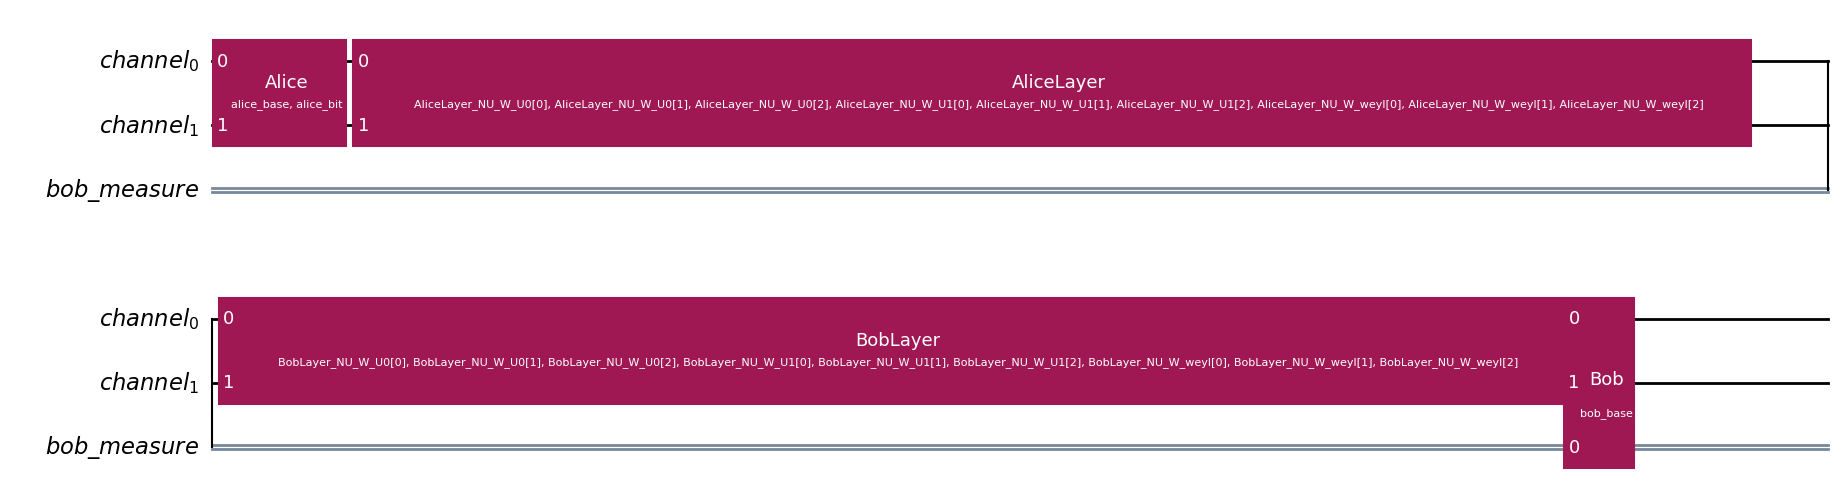

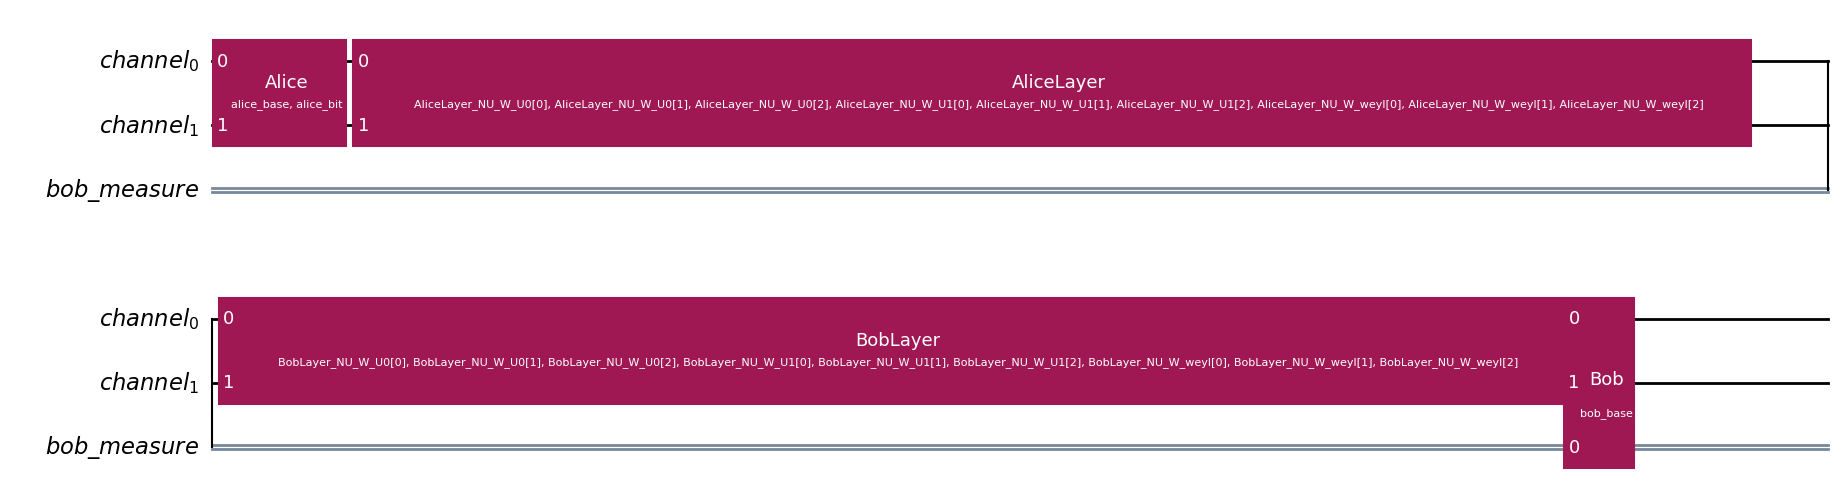

In [2]:
layers = [EntangledLayer("AliceLayer"), EntangledLayer("BobLayer")]
eve = MultiQubitQCLEve()

ab_protocol = BB84TrainableProtocol(n_bits=512, elements=layers, channel_size=2, seed=0, learning_rate=0.1)
eve_protocol = BB84EveTrainableProtocol(n_bits=512, elements=[layers[0], eve, layers[1]], channel_size=2,
                                        seed=0, alpha=1, learning_rate=0.05)

qc, _ = ab_protocol.qc_with_ctx()
qc.draw("mpl", expr_len=3)

In [3]:
def train_eve():
    bob_qber, eve_qber = [], []
    qber = eve_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(qber['eve_qber'])
    print(f'start QBER: {qber}')
    for epoch in range(50):
        loss = eve_protocol.train()
        qber = eve_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(qber['eve_qber'])
        if epoch % 5 == 0 or epoch == 49:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

def train_ab():
    bob_qber, eve_qber = [], []
    qber = ab_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(0.5)
    print(f'start QBER: {qber}')
    for epoch in range(20):
        loss = ab_protocol.train()
        qber = ab_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(0.5)
        if epoch % 5 == 0 or epoch == 19:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

# Krok 1 - trenowanie Alice i Boba do początkowego stanu
Uczymy Alice i Boba bez Eve, aby miały sensowne parametry początkowe i potrafiły przekazywać sobie dane.

In [4]:
b_q, e_q = train_ab()

start QBER: {'bob_qber': np.float64(0.2420634920634921)}
epoch: 0, loss: -0.7849401235580444, QBER: {'bob_qber': np.float64(0.11904761904761907)}
epoch: 5, loss: -0.9445581436157227, QBER: {'bob_qber': np.float64(0.03968253968253965)}
epoch: 10, loss: -0.9839800000190735, QBER: {'bob_qber': np.float64(0.015873015873015928)}
epoch: 15, loss: -0.9856005907058716, QBER: {'bob_qber': np.float64(0.011904761904761862)}
epoch: 19, loss: -0.9943813681602478, QBER: {'bob_qber': np.float64(0.003968253968253954)}


<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

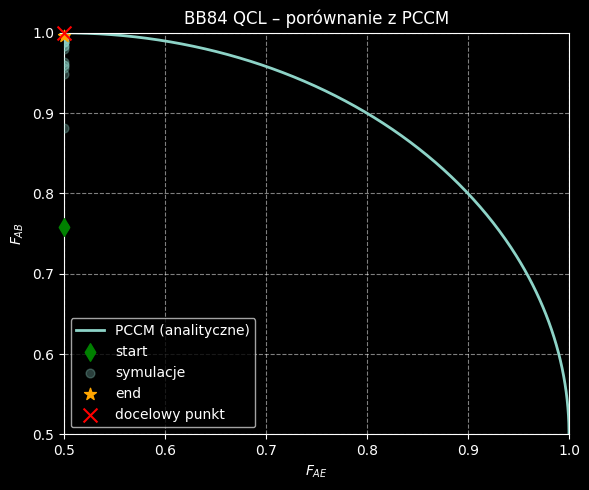

In [5]:
plt_fab_fae(b_q, e_q, 1)

# Krok 2 - trenowanie tylko Eve, warstwy Alice i Boba zamrożone
Uczymy samą Eve, docelowa dokładność Boba to 0.8. Startujemy od parametrów Alice i Boba wytrenowanych w poprzednim kroku i Eve jako identyczność.

In [6]:
eve_protocol.set_parameters(ab_protocol.get_all_parameters())

params = eve_protocol.get_all_parameters()
for p in eve.nu.params():
    k = p.name
    params[k] = 0

eve_protocol.set_parameters(params)
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.0), 'NU_W_0_0_U0[1]': np.float32(0.0), 'NU_W_0_0_U0[2]': np.float32(0.0), 'NU_W_0_0_U1[0]': np.float32(0.0), 'NU_W_0_0_U1[1]': np.float32(0.0), 'NU_W_0_0_U1[2]': np.float32(0.0), 'NU_W_0_0_weyl[0]': np.float32(0.0), 'NU_W_0_0_weyl[1]': np.float32(0.0), 'NU_W_0_0_weyl[2]': np.float32(0.0), 'NU_W_0_1_U0[0]': np.float32(0.0), 'NU_W_0_1_U0[1]': np.float32(0.0), 'NU_W_0_1_U0[2]': np.float32(0.0), 'NU_W_0_1_U1[0]': np.float32(0.0), 'NU_W_0_1_U1[1]': np.float32(0.0), 'NU_W_0_1_U1[2]': np.float32(0.0), 'NU_W_0_1_weyl[0]': np.float32(0.0), 'NU_W_0_1_weyl[1]': np.float32(0.0), 'NU_W_0_1_weyl[2]': np.float32(0.0), 'NU_W_1_0_U0[0]': np.float32(0.0), 'NU_W_1_0_U0[1]': np.float32(0.0), 'NU_W_1_0_U0[2]': np.float32(0.0), 'NU_W_1_0_U1[0]': np.float32(0.0), 'NU_W_1_0_U1[1]': np.float32(0.0), 'NU_W_1_0_U1[2]': np.float32(0.0), 'NU_W_1_0_weyl[0]': np.float32(0.0), 'NU_W_1_0_weyl[1]': np.float32(0.0), 'NU_W_1_0_weyl[2]': np.float32(0.0), 'NU_W_2_0_U0[0

In [7]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss8
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.011029411764705843), 'eve_qber': np.float64(0.5367647058823529)}
epoch: 0, loss: -0.6005666255950928, QBER: {'bob_qber': np.float64(0.02941176470588236), 'eve_qber': np.float64(0.5404411764705883)}
epoch: 5, loss: -0.6894596219062805, QBER: {'bob_qber': np.float64(0.3529411764705882), 'eve_qber': np.float64(0.4742647058823529)}
epoch: 10, loss: -0.8103395700454712, QBER: {'bob_qber': np.float64(0.4227941176470589), 'eve_qber': np.float64(0.30514705882352944)}
epoch: 15, loss: -1.004712700843811, QBER: {'bob_qber': np.float64(0.28308823529411764), 'eve_qber': np.float64(0.2095588235294118)}
epoch: 20, loss: -1.0348540544509888, QBER: {'bob_qber': np.float64(0.23897058823529416), 'eve_qber': np.float64(0.20220588235294112)}
epoch: 25, loss: -1.0684843063354492, QBER: {'bob_qber': np.float64(0.22058823529411764), 'eve_qber': np.float64(0.17279411764705888)}
epoch: 30, loss: -1.1274750232696533, QBER: {'bob_qber': np.float64(0.21691176470588236), 'eve_

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

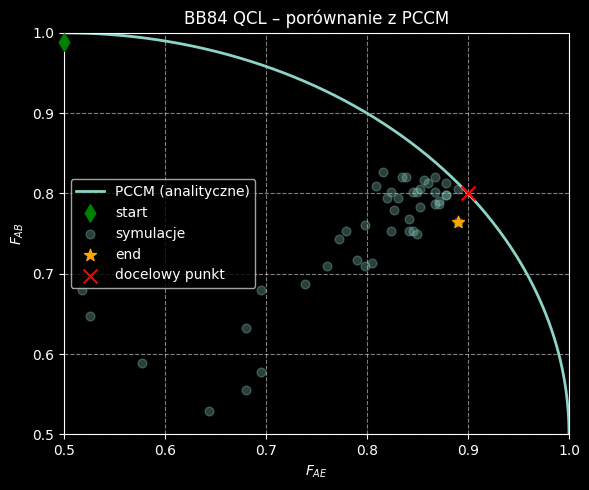

In [8]:
plt_fab_fae(b_q, e_q, 0.8)

# Krok 3 - trenowanie warstw Alice i Boba, Eve zamrożona
Próbujemy uczyć Alice i Boba z użyciem nowej funkcji straty, która maksymalizuje jedynie dokładność Boba.

In [9]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(0.003555609), 'AliceLayer_NU_W_U0[1]': np.float32(-0.949678), 'AliceLayer_NU_W_U0[2]': np.float32(0.80562574), 'AliceLayer_NU_W_U1[0]': np.float32(0.46914548), 'AliceLayer_NU_W_U1[1]': np.float32(0.75761217), 'AliceLayer_NU_W_U1[2]': np.float32(-0.43026638), 'AliceLayer_NU_W_weyl[0]': np.float32(-0.11702791), 'AliceLayer_NU_W_weyl[1]': np.float32(-0.11087614), 'AliceLayer_NU_W_weyl[2]': np.float32(0.23050758), 'BobLayer_NU_W_U0[0]': np.float32(-0.11631521), 'BobLayer_NU_W_U0[1]': np.float32(-0.7274549), 'BobLayer_NU_W_U0[2]': np.float32(0.87611204), 'BobLayer_NU_W_U1[0]': np.float32(0.16968484), 'BobLayer_NU_W_U1[1]': np.float32(0.8897375), 'BobLayer_NU_W_U1[2]': np.float32(-0.37472507), 'BobLayer_NU_W_weyl[0]': np.float32(0.18482564), 'BobLayer_NU_W_weyl[1]': np.float32(0.17514414), 'BobLayer_NU_W_weyl[2]': np.float32(-0.23350888)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(-0.34487745), 'NU_W_0_0_U0[1]': np.float32(0.22

In [10]:
eve_loss = eve_protocol.loss
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.23529411764705888), 'eve_qber': np.float64(0.11029411764705888)}
epoch: 0, loss: -0.788589358329773, QBER: {'bob_qber': np.float64(0.22058823529411764), 'eve_qber': np.float64(0.13970588235294112)}
epoch: 5, loss: -0.8551610708236694, QBER: {'bob_qber': np.float64(0.12867647058823528), 'eve_qber': np.float64(0.20220588235294112)}
epoch: 10, loss: -0.9086652994155884, QBER: {'bob_qber': np.float64(0.0845588235294118), 'eve_qber': np.float64(0.2867647058823529)}
epoch: 15, loss: -0.9391260147094727, QBER: {'bob_qber': np.float64(0.06617647058823528), 'eve_qber': np.float64(0.3897058823529411)}
epoch: 20, loss: -0.9647995233535767, QBER: {'bob_qber': np.float64(0.03676470588235292), 'eve_qber': np.float64(0.4595588235294118)}
epoch: 25, loss: -0.9701546430587769, QBER: {'bob_qber': np.float64(0.02573529411764708), 'eve_qber': np.float64(0.4963235294117647)}
epoch: 30, loss: -0.9831634759902954, QBER: {'bob_qber': np.float64(0.022058823529411797), 'eve

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

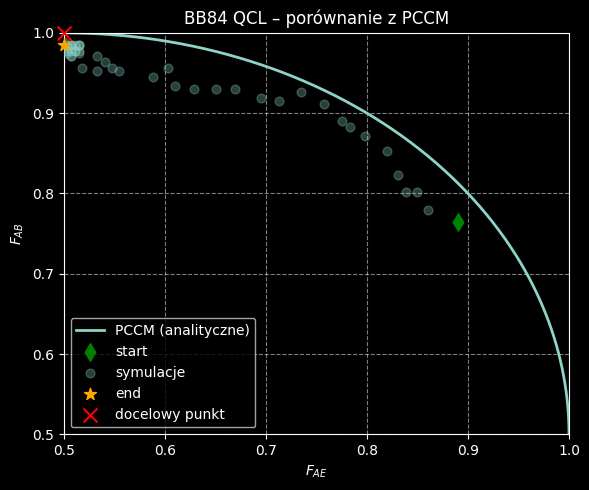

In [11]:
plt_fab_fae(b_q, e_q, 1)

In [12]:
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(-0.34487745), 'NU_W_0_0_U0[1]': np.float32(0.22779663), 'NU_W_0_0_U0[2]': np.float32(0.0044126753), 'NU_W_0_0_U1[0]': np.float32(0.2570622), 'NU_W_0_0_U1[1]': np.float32(0.45340374), 'NU_W_0_0_U1[2]': np.float32(0.16135617), 'NU_W_0_0_weyl[0]': np.float32(-0.4200771), 'NU_W_0_0_weyl[1]': np.float32(0.57887125), 'NU_W_0_0_weyl[2]': np.float32(0.43898192), 'NU_W_0_1_U0[0]': np.float32(0.70001465), 'NU_W_0_1_U0[1]': np.float32(-0.79597646), 'NU_W_0_1_U0[2]': np.float32(-2.5427888e-10), 'NU_W_0_1_U1[0]': np.float32(-0.073240645), 'NU_W_0_1_U1[1]': np.float32(0.33185133), 'NU_W_0_1_U1[2]': np.float32(7.506413e-10), 'NU_W_0_1_weyl[0]': np.float32(-0.15027387), 'NU_W_0_1_weyl[1]': np.float32(-0.14046538), 'NU_W_0_1_weyl[2]': np.float32(-0.718782), 'NU_W_1_0_U0[0]': np.float32(0.0072785635), 'NU_W_1_0_U0[1]': np.float32(-0.038783345), 'NU_W_1_0_U0[2]': np.float32(0.08983055), 'NU_W_1_0_U1[0]': np.float32(-0.34338516), 'NU_W_1_0_U1[1]': np.flo

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [13]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss8
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.014705882352941124), 'eve_qber': np.float64(0.5036764705882353)}
epoch: 0, loss: -0.588310182094574, QBER: {'bob_qber': np.float64(0.05147058823529416), 'eve_qber': np.float64(0.40441176470588236)}
epoch: 5, loss: -1.052623987197876, QBER: {'bob_qber': np.float64(0.23161764705882348), 'eve_qber': np.float64(0.18382352941176472)}
epoch: 10, loss: -1.1410865783691406, QBER: {'bob_qber': np.float64(0.22058823529411764), 'eve_qber': np.float64(0.14338235294117652)}
epoch: 15, loss: -1.1370437145233154, QBER: {'bob_qber': np.float64(0.20220588235294112), 'eve_qber': np.float64(0.15073529411764708)}
epoch: 20, loss: -1.1638548374176025, QBER: {'bob_qber': np.float64(0.2279411764705882), 'eve_qber': np.float64(0.11029411764705888)}
epoch: 25, loss: -1.1775379180908203, QBER: {'bob_qber': np.float64(0.2095588235294118), 'eve_qber': np.float64(0.11397058823529416)}
epoch: 30, loss: -1.1552841663360596, QBER: {'bob_qber': np.float64(0.19117647058823528), 'ev

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

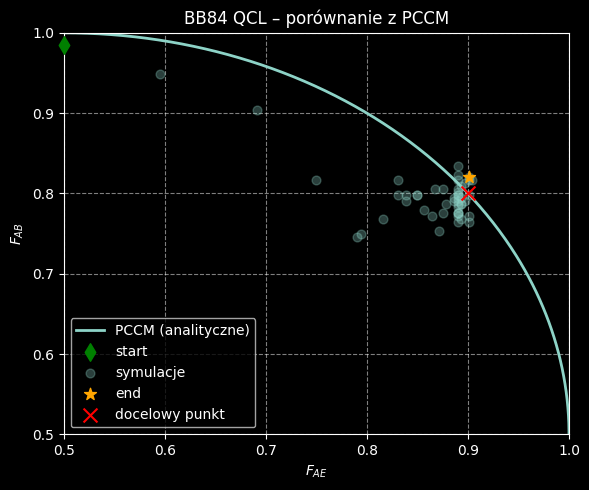

In [14]:
plt_fab_fae(b_q, e_q, 0.8)

In [15]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(-1.0621198), 'AliceLayer_NU_W_U0[1]': np.float32(-0.9800793), 'AliceLayer_NU_W_U0[2]': np.float32(1.4742811), 'AliceLayer_NU_W_U1[0]': np.float32(1.0503986), 'AliceLayer_NU_W_U1[1]': np.float32(1.1253674), 'AliceLayer_NU_W_U1[2]': np.float32(-0.43026638), 'AliceLayer_NU_W_weyl[0]': np.float32(1.2540457), 'AliceLayer_NU_W_weyl[1]': np.float32(0.44788265), 'AliceLayer_NU_W_weyl[2]': np.float32(-0.9290219), 'BobLayer_NU_W_U0[0]': np.float32(-0.38274252), 'BobLayer_NU_W_U0[1]': np.float32(-0.65929586), 'BobLayer_NU_W_U0[2]': np.float32(0.99747384), 'BobLayer_NU_W_U1[0]': np.float32(0.72133833), 'BobLayer_NU_W_U1[1]': np.float32(2.134627), 'BobLayer_NU_W_U1[2]': np.float32(0.5999532), 'BobLayer_NU_W_weyl[0]': np.float32(-0.46384645), 'BobLayer_NU_W_weyl[1]': np.float32(0.35488847), 'BobLayer_NU_W_weyl[2]': np.float32(0.36170805)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(-0.55604154), 'NU_W_0_0_U0[1]': np.float32(0.2579841), 

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [16]:
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.18014705882352944), 'eve_qber': np.float64(0.09926470588235292)}
epoch: 0, loss: -0.7968877553939819, QBER: {'bob_qber': np.float64(0.16176470588235292), 'eve_qber': np.float64(0.11764705882352944)}
epoch: 5, loss: -0.8582843542098999, QBER: {'bob_qber': np.float64(0.11029411764705888), 'eve_qber': np.float64(0.1875)}
epoch: 10, loss: -0.9135491251945496, QBER: {'bob_qber': np.float64(0.07352941176470584), 'eve_qber': np.float64(0.2683823529411765)}
epoch: 15, loss: -0.9616090059280396, QBER: {'bob_qber': np.float64(0.05147058823529416), 'eve_qber': np.float64(0.34191176470588236)}
epoch: 20, loss: -0.9861491918563843, QBER: {'bob_qber': np.float64(0.007352941176470562), 'eve_qber': np.float64(0.42647058823529416)}
epoch: 25, loss: -0.9785693883895874, QBER: {'bob_qber': np.float64(0.014705882352941124), 'eve_qber': np.float64(0.5036764705882353)}
epoch: 30, loss: -0.9831455945968628, QBER: {'bob_qber': np.float64(0.011029411764705843), 'eve_qber':

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

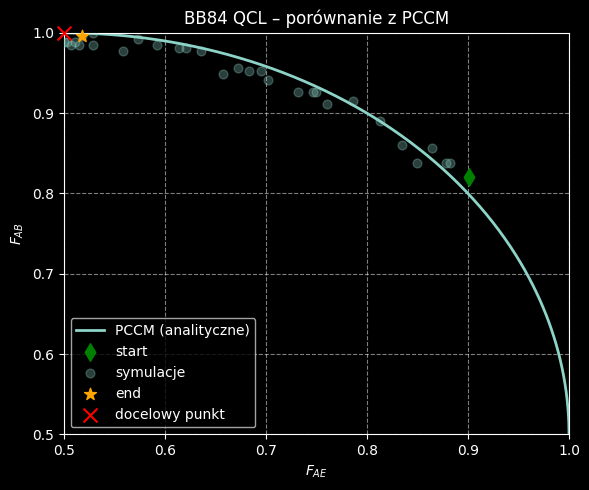

In [17]:
plt_fab_fae(b_q, e_q, 1)

In [18]:
print("All parameters:", eve_protocol.get_all_parameters())

All parameters: {'NU_W_0_0_U0[0]': np.float32(-0.55604154), 'NU_W_0_0_U0[1]': np.float32(0.2579841), 'NU_W_0_0_U0[2]': np.float32(0.11663788), 'NU_W_0_0_U1[0]': np.float32(0.2036595), 'NU_W_0_0_U1[1]': np.float32(0.2504716), 'NU_W_0_0_U1[2]': np.float32(-7.3925534e-05), 'NU_W_0_0_weyl[0]': np.float32(-0.8013159), 'NU_W_0_0_weyl[1]': np.float32(0.1446621), 'NU_W_0_0_weyl[2]': np.float32(0.95375484), 'NU_W_0_1_U0[0]': np.float32(0.38157934), 'NU_W_0_1_U0[1]': np.float32(-0.9309206), 'NU_W_0_1_U0[2]': np.float32(-2.5427888e-10), 'NU_W_0_1_U1[0]': np.float32(-0.030612227), 'NU_W_0_1_U1[1]': np.float32(0.165759), 'NU_W_0_1_U1[2]': np.float32(7.506413e-10), 'NU_W_0_1_weyl[0]': np.float32(-0.122180745), 'NU_W_0_1_weyl[1]': np.float32(-0.14203516), 'NU_W_0_1_weyl[2]': np.float32(-0.84979224), 'NU_W_1_0_U0[0]': np.float32(-0.04532091), 'NU_W_1_0_U0[1]': np.float32(-0.21253422), 'NU_W_1_0_U0[2]': np.float32(-0.0693112), 'NU_W_1_0_U1[0]': np.float32(-0.19700575), 'NU_W_1_0_U1[1]': np.float32(-0.8

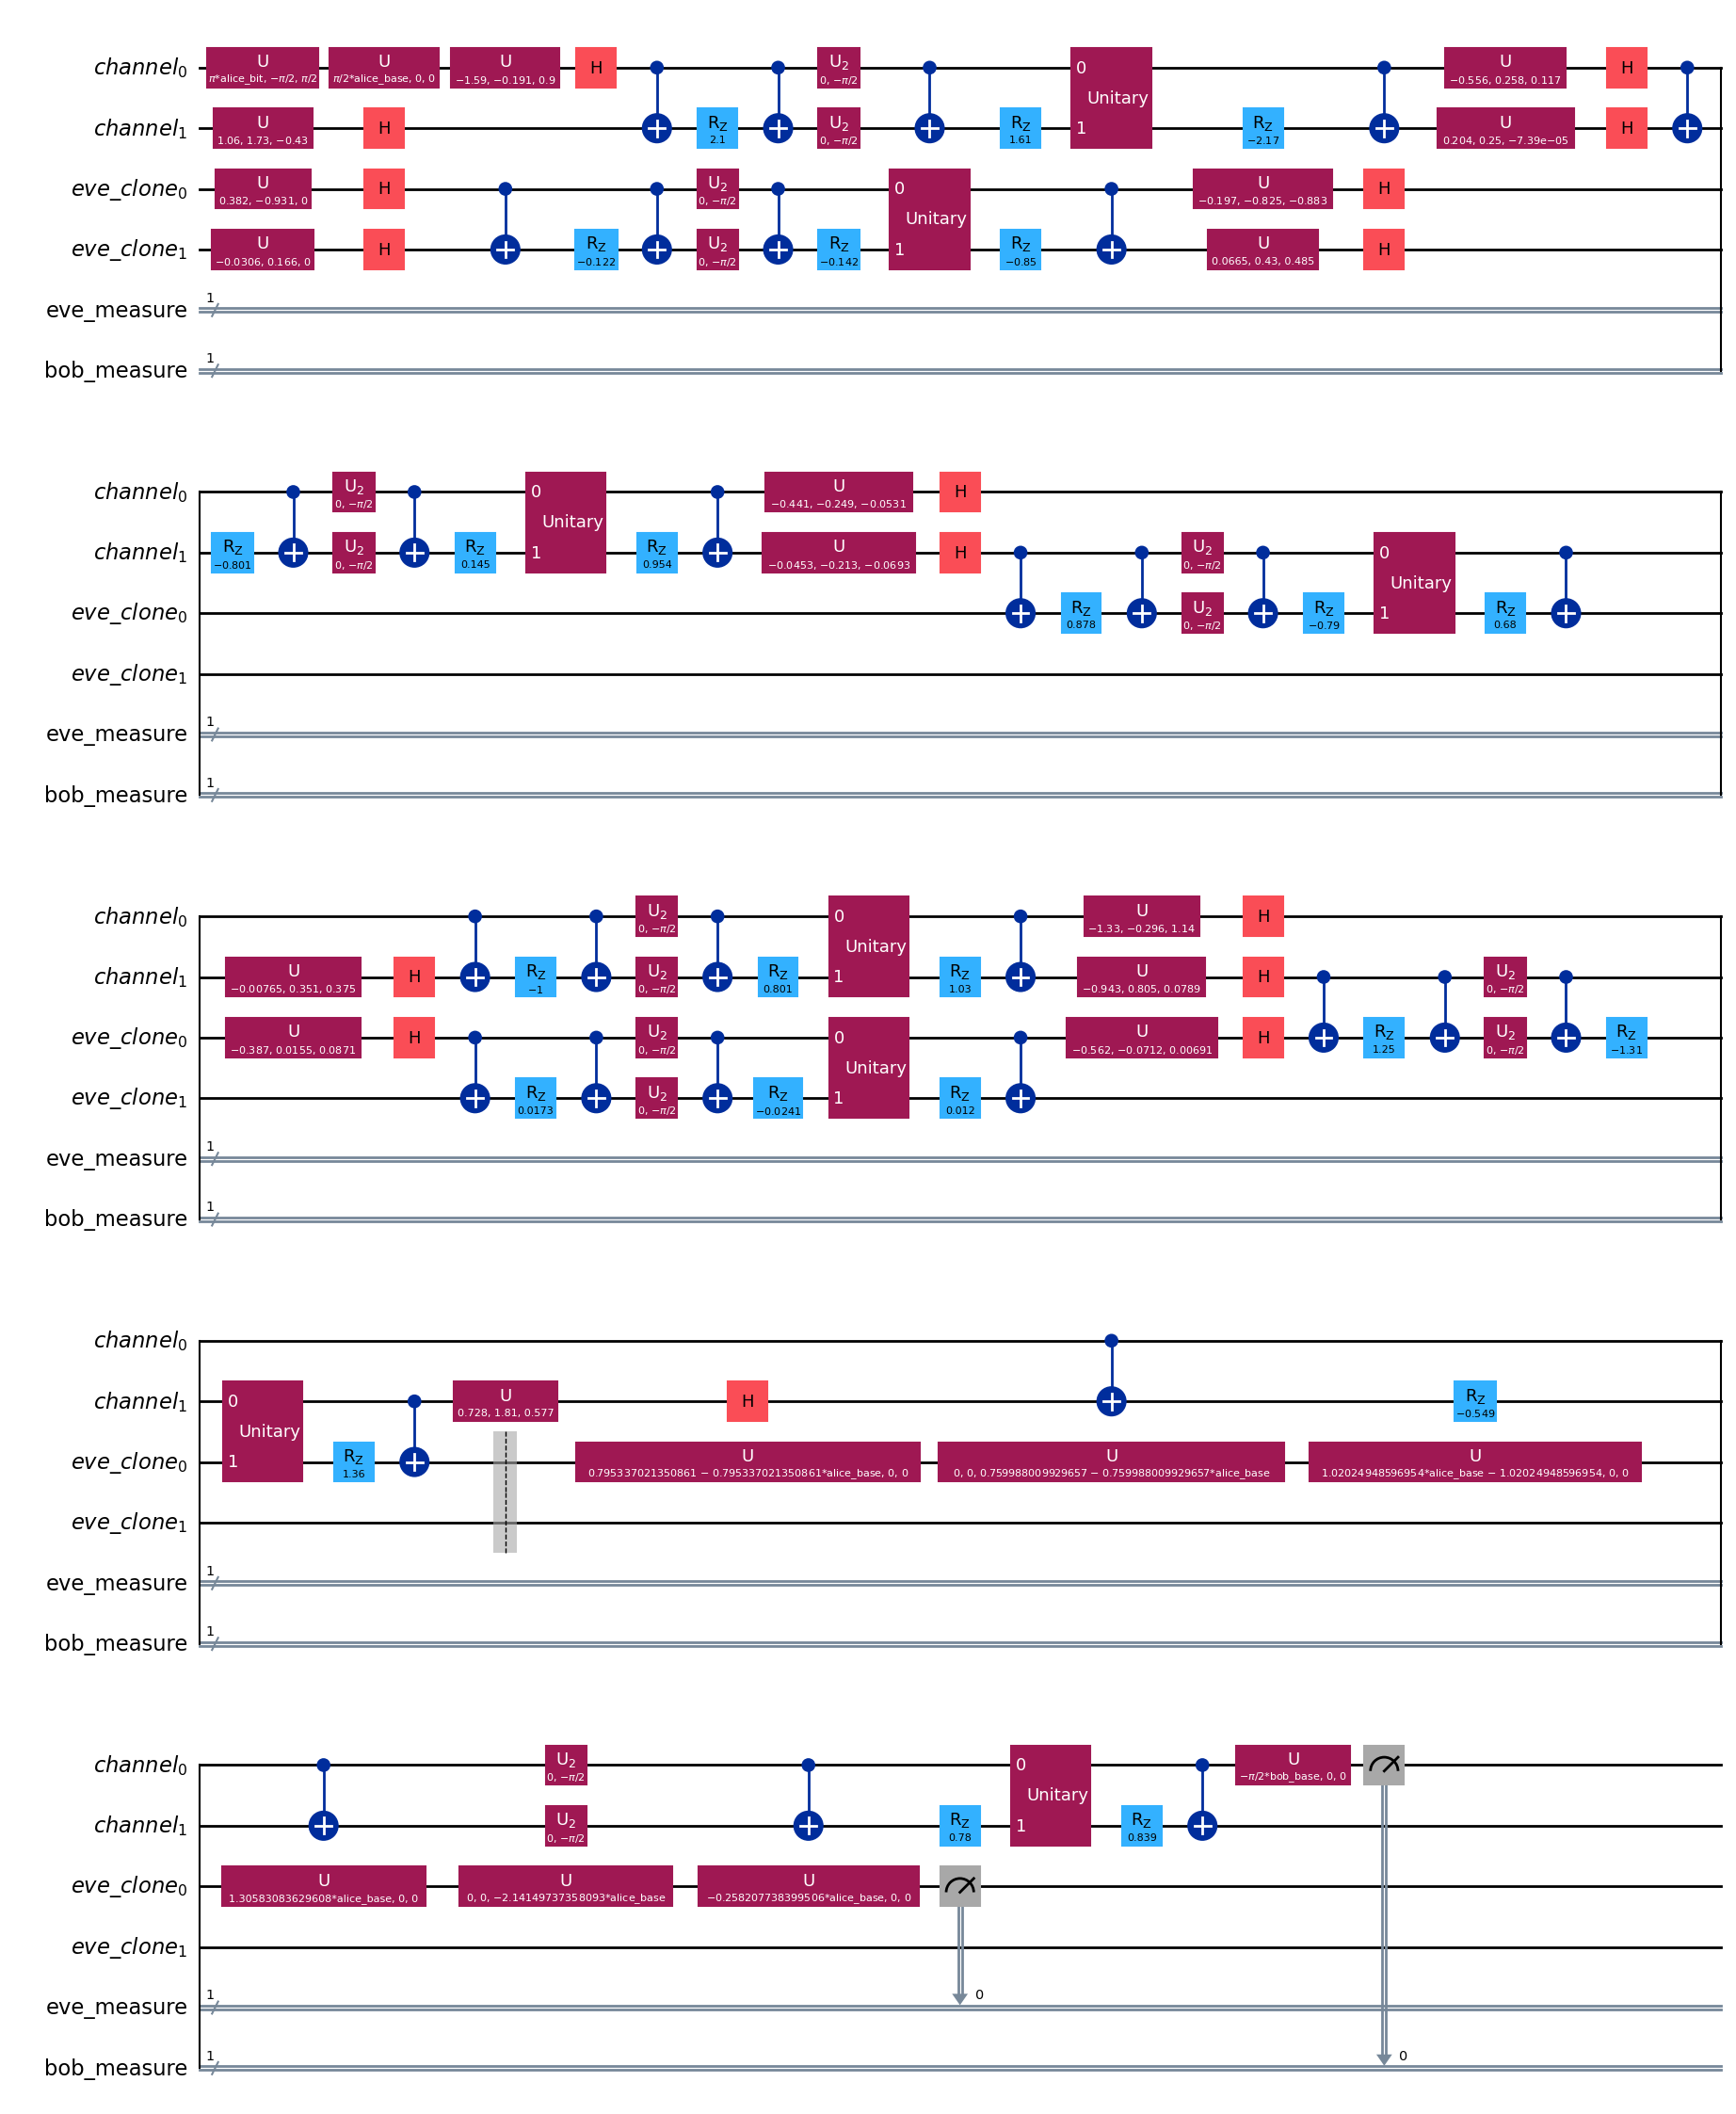

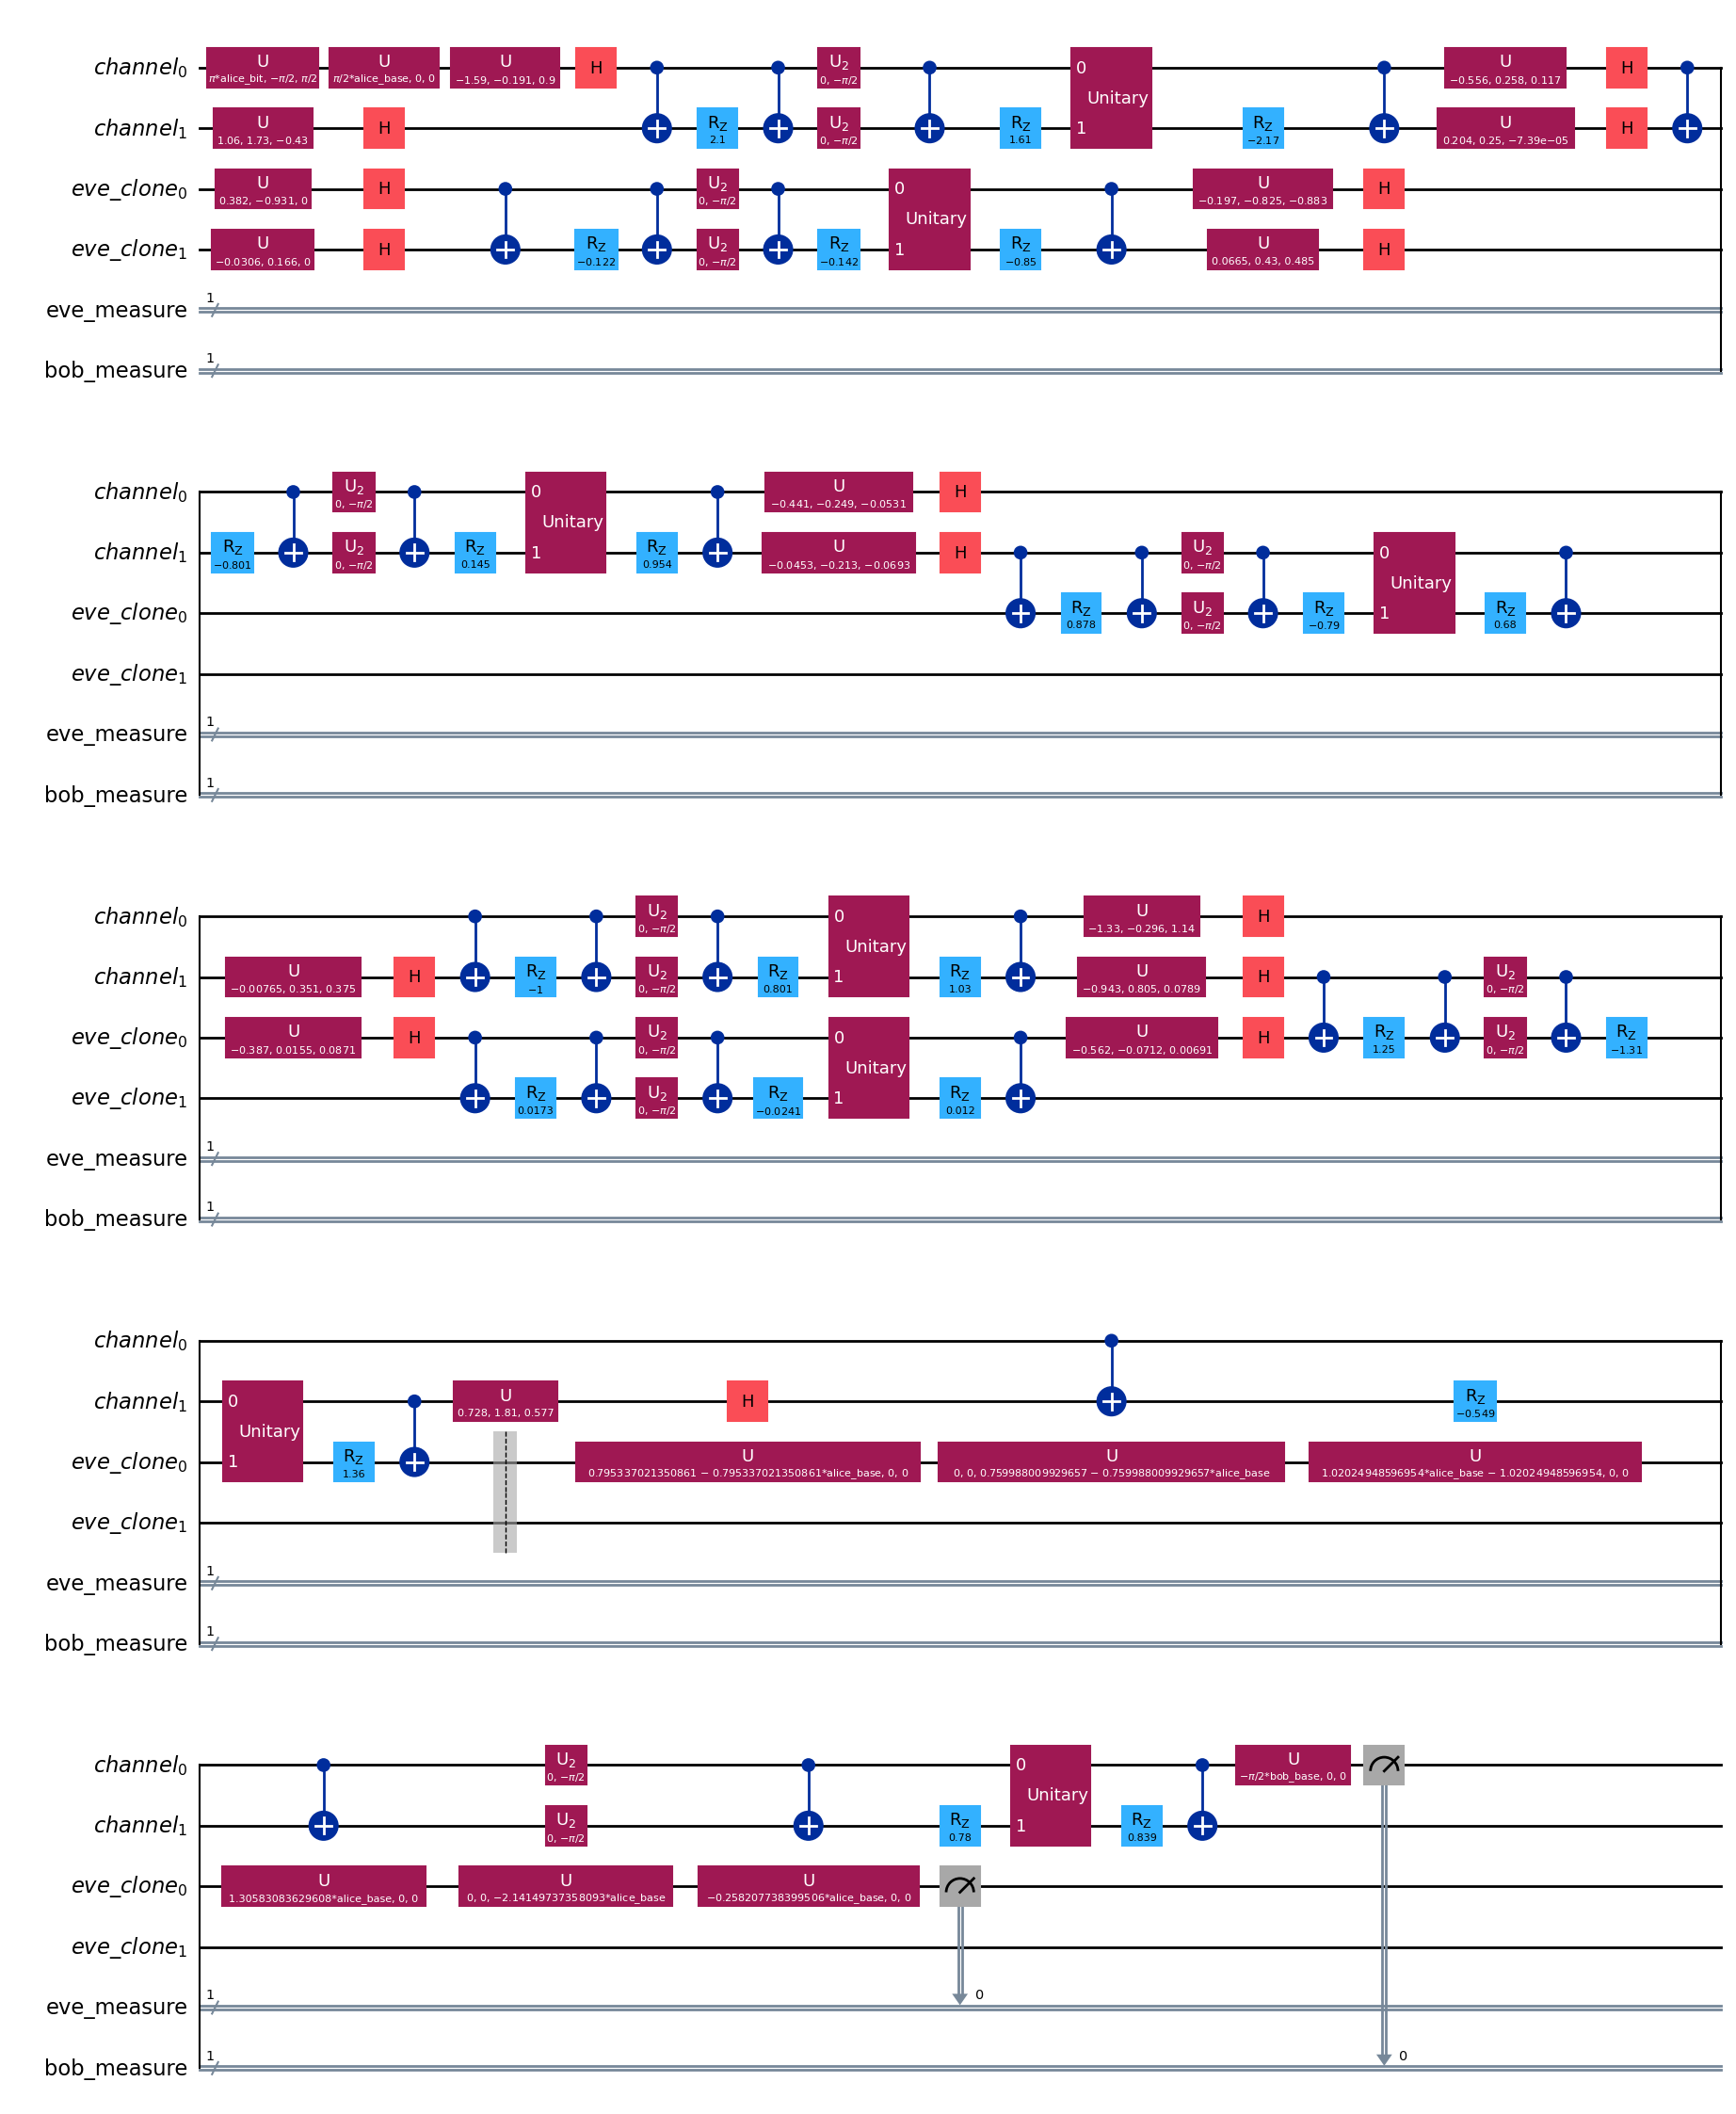

In [19]:
eve_protocol._qc.assign_parameters(eve_protocol.get_all_parameters()).draw("mpl")